# **LAB: LINEAR REGRESSION**
Packages used:
 - `statsmodels` is meant for "conducting statistical tests, and statistical data exploration" it is technically more similar to R in its function, syntax and general use;
 - `sklearn` is meant for prediction; knowledge of scikit-learn is a very valuable skill nowadays, so I thought it best to include it;
 - and of course, `pandas` for data wrangling and organizing, as well as `matplotlib` and `seaborn` for pictures.


## **0. Preliminaries.**

First we import the necessary packages:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm

sns.set_theme(style="darkgrid") # because it's pretty

The Boston data set records `medv` (median house value) for 506 neighbourhoods around Boston. We will seek to predict `medv` using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).

The Boston dataset can be directly loaded from within `sklearn`; a lis of other toy datasets is available [here](https://scikit-learn.org/stable/datasets/index.html#toy-datasets). To learn more about the dataset, we use the attribute DESCR.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston() 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## **1. Simple linear regression.**
Let's start with a simple linear regression, using `MEDV` as the response and `LSTAT` as the predictor. We can get the list of the feature names with the `feature_names` attribute.

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

`LSTAT` corresponds to index 12; we can get a list of the values in that column with:

In [4]:
boston.data[:,12]

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

To do our regression, we're going to need the `LinearRegression` class from `sklearn.linear_model`. We also give names to our predictor $X$ and target $y$.

In [5]:
from sklearn.linear_model import LinearRegression

X = boston.data[:,12]
y = boston.target

linreg = LinearRegression()

Before we fit the model, we need to turn $X$ into a column vector (because that's how `sklearn` works).

In [6]:
X_reshaped = X[:, np.newaxis]

print("X.shape:", X.shape)
print("X_reshaped.shape:", X_reshaped.shape)

X.shape: (506,)
X_reshaped.shape: (506, 1)


Now we can fit the model; in passing, we get the $y$-intercept, coefficient, and predictions of our model. Unlike R, sklearn doesn't offer a full statistical summary of the data and model fit, but we can still get the residual sum of squares, $R^²$, and other stuff.

In [7]:
linreg.fit(X_reshaped,y)
y_pred = linreg.predict(X_reshaped)
b0, b1 = linreg.intercept_, linreg.coef_

# We can also obtain a few additional statistics, like
r2 = linreg.score(X_reshaped, y)
rss = np.linalg.norm(y - y_pred) ** 2  #RSS, which is what lm.residues_ returns
print(f"y = {b0} + {b1[0]} * x")
print("r2:", r2)
print("RSS:", rss)

y = 34.5538408793831 + -0.9500493537579906 * x
r2: 0.5441462975864797
RSS: 19472.381418326433


To get a full statistical summary, we ask `statsmodels`; by default, `sm.OLS` has no constant term. Since the constant term ($y$-intercept) of a regression is the regression coefficient of a constant vector with $1$'s in each rows, we use tThe function `sm.add_constant` to add a column of $1$'s to our matrix of predictors.

In [8]:
X_sm = sm.add_constant(X)
linreg_sm = sm.OLS(y, X_sm)
linreg_sm = linreg_sm.fit()
print(linreg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           5.08e-88
Time:                        17:19:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

Let's plot our best-fit line using `seaborn` to see what it looks like; `sns.regplot()` actually computes the best-fit line by itself so we only need to pass it our predictor and target.

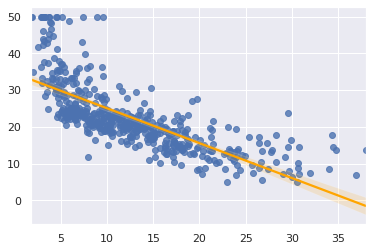

In [9]:
sns.regplot(x=X_reshaped, y=y, line_kws={'color':'orange'});

This looks OK, but it's not a great fit. Maybe the relationship is not _that_ linear? Let's plot the residues to find out:

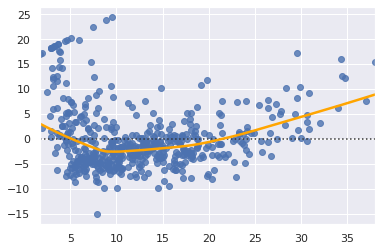

In [10]:
sns.residplot(x=X_reshaped, y=y, lowess=True, line_kws={'color': 'orange', 'lw': 2.5, 'alpha': 1});

OK, there's definitely some kind of structure there. We'll come back to this later.

## **2. Multiple linear regression.**

Since we have many different predictors, we'll use a pandas DataFrame instead of an array; this is one way to keep our column names in the plots/statistics summaries.

In [11]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

**Scatterplot matrix.** This part is prooobably not that useful, but it makes me look smart so I'll just leave it here:

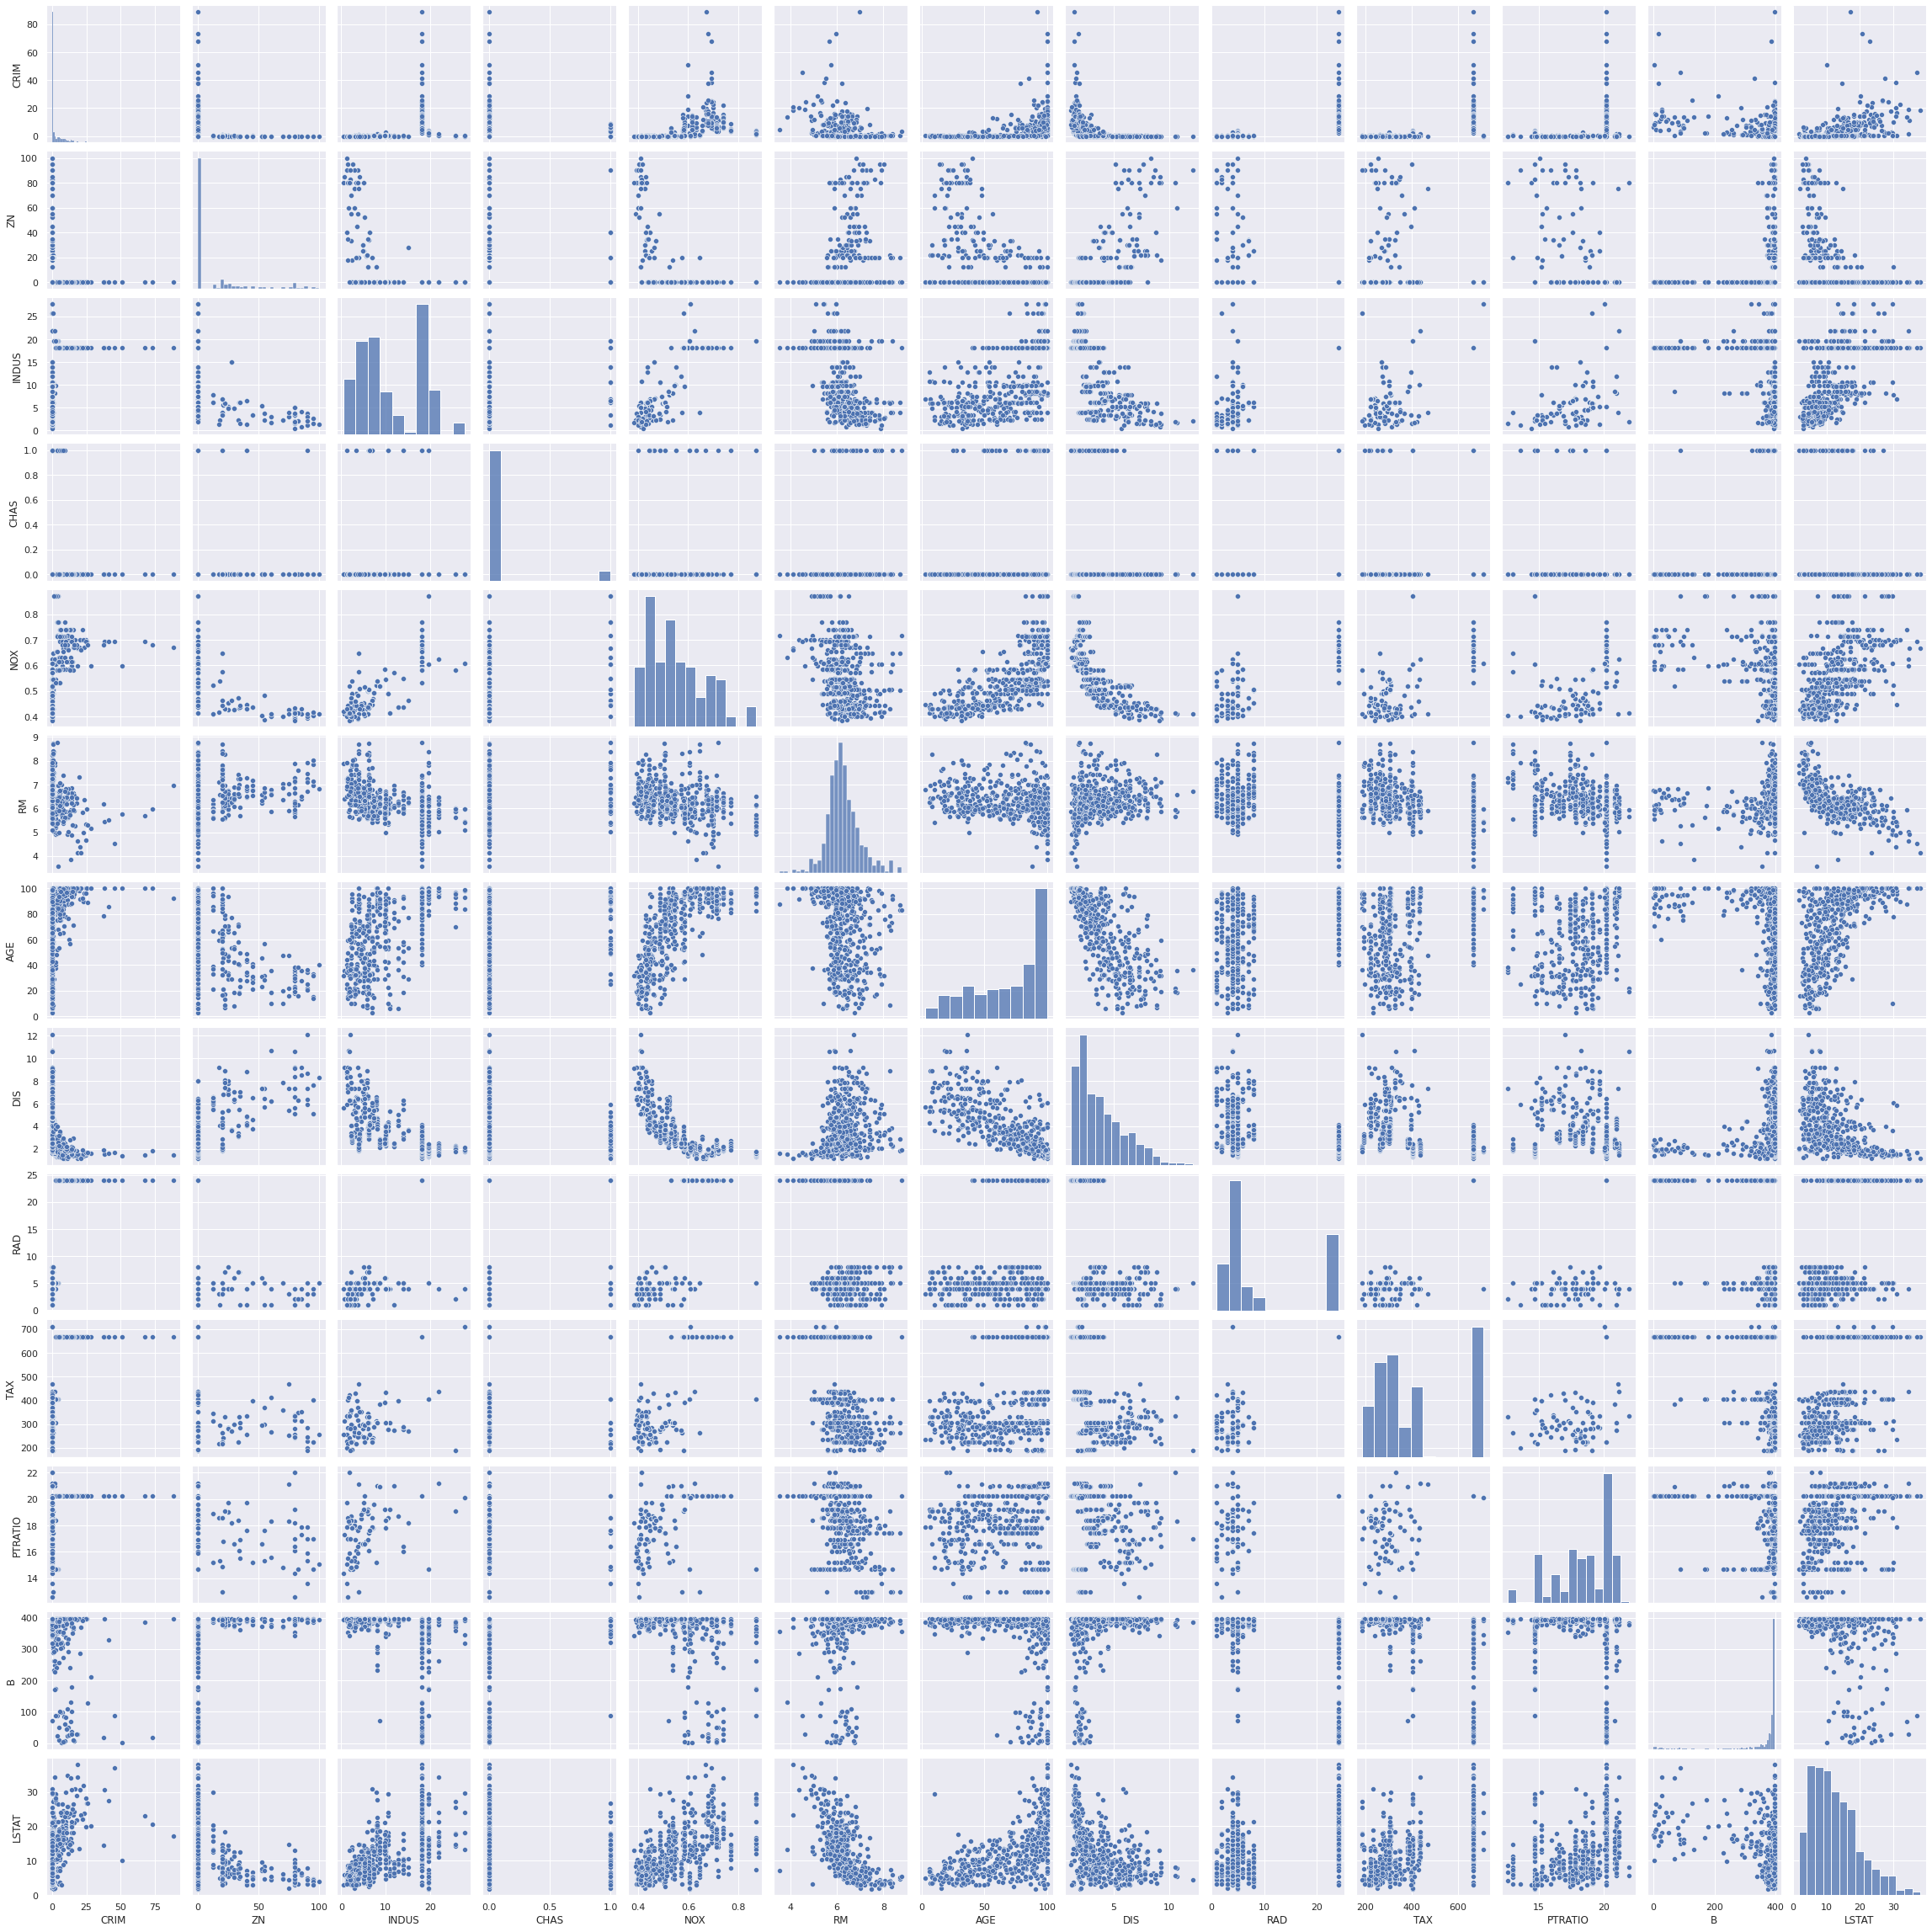

In [12]:
sns.pairplot(data=df);

OK, back to work: we fit our model in the same way as above, except this time we use all of the data. Here's the syntax for `sklearn`. Note that we pass the dataframe as an argument to the `.fit()` method; we could also pass the `boston.data` array.

In [13]:
multreg_sk = LinearRegression()
multreg_sk.fit(df, y)

print("intercept:", multreg_sk.intercept_)
print("coefficients:", multreg_sk.coef_)

intercept: 36.459488385090125
coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


...and here's the one with `statsmodels`; in this case, passing the dataframe allows us to keep column names in the statistical summary. Nifty.

In [14]:
df_sm = sm.add_constant(df)
multreg_sm = sm.OLS(y, df_sm)
multreg_sm = multreg_sm.fit()
print(multreg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        17:19:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Coefficients are the same in both cases. That's reassuring.

## **3. Interaction terms.**

`sklearn` doesn't handle interaction terms natively; the easiest way to do this is to add an interaction column to our dataframe.

In [15]:
df['LSTAT*AGE'] = df['LSTAT'] * df['AGE']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT*AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,324.696
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,721.146
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,246.233
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,134.652
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,288.886


We then do our regression with `LSTAT`, `AGE`, and the interaction term `LSTAT * AGE`:

In [16]:
interreg = LinearRegression()
interreg.fit(df[['LSTAT', 'AGE', 'LSTAT*AGE']], y)

print("intercept:", interreg.intercept_)
print("coefficients:", interreg.coef_)

intercept: 36.08853593461289
coefficients: [-1.39211684e+00 -7.20859509e-04  4.15595185e-03]


For `statmodels`, there are two options. If the model we're fitting supports [formulas](https://www.statsmodels.org/stable/example_formulas.html?highlight=interaction%20term), we import `statsmodels.formula.api` and we can pass R-style formulas to our model, like so:

In [17]:
import statsmodels.formula.api as smf

Note that we need the target to be a column in our dataframe for this to work

In [18]:
df['MEDV'] = boston.target
interreg_sm = smf.ols(formula='MEDV ~ LSTAT * AGE', data=df)
interreg_sm = interreg_sm.fit()
print(interreg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           4.86e-88
Time:                        17:19:49   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## **4. Transformations.**
We come back to fitting `MEDV` as a linear function of `LSTAT`. Since our residues looked like they had some structure, we try a quadratic model:

In [19]:
df['LSTAT^2'] = df['LSTAT'] ** 2

In [20]:
quadreg = LinearRegression()
quadreg.fit(df[['LSTAT', 'LSTAT^2']], df['MEDV'])

print("intercept:", quadreg.intercept_)
print("coefficients:", quadreg.coef_)

intercept: 42.862007328169355
coefficients: [-2.3328211   0.04354689]


Let's look at our prediction:

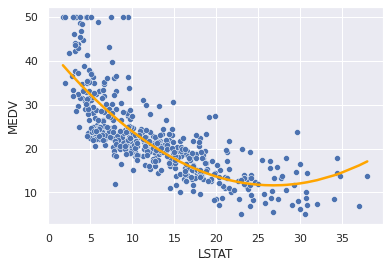

In [21]:
y_quadpred = quadreg.predict(df[['LSTAT', 'LSTAT^2']])

sns.scatterplot(x='LSTAT', y='MEDV', data=df)
sns.lineplot(x=df['LSTAT'], y=y_quadpred, color='orange', lw=2.5);

Looks much better! Now let's get a summary with `statsmodels`. We could use `statsmodels.formulas.api` since ordinary least squares can handle formulas, but this time we'll use `patsy` to create a matrix with the right columns. Note the use of `I(...)` to wrap around the power: this tells patsy to interpret what's in the brackets as a numpy formula.

In [22]:
import patsy
f = 'MEDV ~ LSTAT + I(LSTAT ** 2)'
y,X_quadreg = patsy.dmatrices(f, df, return_type='dataframe')

In [23]:
X_quadreg.head()

,Intercept,LSTAT,I(LSTAT ** 2)
0,1.0,4.98,24.8004
1,1.0,9.14,83.5396
2,1.0,4.03,16.2409
3,1.0,2.94,8.6436
4,1.0,5.33,28.4089


In [24]:
quadreg_sm = sm.OLS(y, X_quadreg).fit()
print(quadreg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.56e-112
Time:                        17:19:52   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

Note the very low p-value for the squared term; this suggests the quadratic model is a nontrivial improvement over the linear one.

In [25]:
table = sm.stats.anova_lm(linreg_sm, quadreg_sm)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


The `sm.stats.anova_lm()` function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. 
The F-statistic is 135 with associated p-value virtually zero, so the quadratic model is far superior.

What about higher order polynomials? Since entering every power would be tedious, we'll use sklearn's `PolynomialFeatures` class, and look at a degree 5 polynomial regression (why not).

In [26]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_reshaped)

In [27]:
polyreg = LinearRegression()
polyreg = polyreg.fit(X_poly,y)

print("coefficients:", polyreg.coef_)
print("intercept:", polyreg.intercept_)

coefficients: [[ 0.00000000e+00 -1.19911168e+01  1.27281826e+00 -6.82738394e-02
   1.72606825e-03 -1.63199416e-05]]
intercept: [67.69967679]


In [28]:
polyreg_sm = sm.OLS(y, X_poly)
polyreg_sm = polyreg_sm.fit()
print(polyreg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          8.73e-122
Time:                        17:19:52   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.0

All the p-values are pretty small, so we're improving the fit with terms of degree up to five!

## **5. Qualitative predictors.**

For this last section, we'll use a simulated dataset that's shipped with the ISLR R-package, which is distributed under a GPL-2 licence. The data represents sales of children car seats; we want to predict `Sales` as a function of the predictors.

In [29]:
carseats = pd.read_csv("data/Carseats.csv", index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


First, let's take a look at our datatypes:

In [30]:
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

`ShelveLoc`, `Urban` and `US`, which are our categorical predictors, are listed as `object` datatypes. `ShelveLoc`, for example, designates the quality of the shelving location in the shop and can take the values `Bad`, `Good`, or `Medium`. We need to convert these predictors to dummy variables, and luckily for us, there's a `pandas` function for that: `pandas.get_dummies()`. `get_dummies()` converts any column of type `object` or `categorical` into dummy variables.

In [31]:
carseats = pd.get_dummies(carseats, drop_first=True)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


The `drop_first` argument allows us to keep $k-1$ columns for a predictor with $k$ categories.

Now we can fit a model with a few interaction terms, for example Income $\times$ Advertising and Price $\times$ Age:

In [32]:
carseats['Income:Advertising'] = carseats['Income'] * carseats['Advertising']
carseats['Price:Age'] = carseats['Price'] * carseats['Age']

In [33]:
catreg = LinearRegression()
catreg.fit(carseats.drop(columns=['Sales']), carseats['Sales'])

print(catreg.coef_)
print(catreg.intercept_)

[ 9.29371187e-02  1.08939611e-02  7.02462284e-02  1.59245307e-04
 -1.00806358e-01 -5.79465902e-02 -2.08524907e-02  4.84867621e+00
  1.95326199e+00  1.40159724e-01 -1.57557143e-01  7.51039210e-04
  1.06759850e-04]
6.57556543887586


In [34]:
carseats['const'] = 1
catreg_sm = sm.OLS(carseats['Sales'], carseats.drop(columns=['Sales']))
print(catreg_sm.fit(hasconst=True).summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          6.14e-166
Time:                        17:19:54   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
CompPrice              0.0929      0

The coefficient associated with `ShelveLoc_Good` is positive, meaning a good shelving location drives the sales up. The one associated with `ShelveLoc_Medium` is positive too, but smaller; so a medium-quality shelf drives sales up, but not as high as a good shelf.